<a href="https://colab.research.google.com/github/cseaboys/dl/blob/main/e11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q ultralytics

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import os
import sys

In [ ]:
# Define 10 relevant categories
WATCH_OPTIONS = {
    1: "person",
    2: "car",
    3: "truck",
    4: "bus",
    5: "motorcycle",
    6: "bicycle",
    7: "dog",
    8: "cat",
    9: "backpack",
    10: "suitcase"
}

print("Available categories to watch (choose up to 10):")
for k, v in WATCH_OPTIONS.items():
    print(f"{k}. {v}")

# User selects categories by index
raw = input("\nEnter indices to watch (comma-separated, e.g. 1,2,3): ").strip()
if not raw:
    selected = [1]  # Default to "person"
else:
    try:
        selected = [int(x.strip()) for x in raw.split(",") if x.strip()]
    except:
        print("Invalid input. Defaulting to 'person'.")
        selected = [1]

# Filter valid keys
watched_classes = [WATCH_OPTIONS[i] for i in selected if i in WATCH_OPTIONS]
if not watched_classes:
    watched_classes = ["person"]

print("\nWatching for:", watched_classes)

# Confidence threshold
try:
    thr = float(input("\nEnter confidence threshold (0–1, default 0.25): ") or 0.25)
    thr = max(0.0, min(1.0, thr))
except:
    thr = 0.25

print(f"Using confidence threshold = {thr:.2f}")

Available categories to watch (choose up to 10):
1. person
2. car
3. truck
4. bus
5. motorcycle
6. bicycle
7. dog
8. cat
9. backpack
10. suitcase

Enter indices to watch (comma-separated, e.g. 1,2,3): 2

Watching for: ['car']

Enter confidence threshold (0–1, default 0.25): 
Using confidence threshold = 0.25


In [ ]:
# Load YOLO model
model_path = "yolov5mu.pt"

model = YOLO(model_path)
print(f"\nModel loaded: {model_path}")



Model loaded: yolov5mu.pt



Upload image(s) to analyze:


Saving car.jpg to car (3).jpg

Processing 'car (3).jpg'...

0: 416x640 1 car, 25.8ms
Speed: 6.1ms preprocess, 25.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)

Start recording
Found car confidence: 84.98%


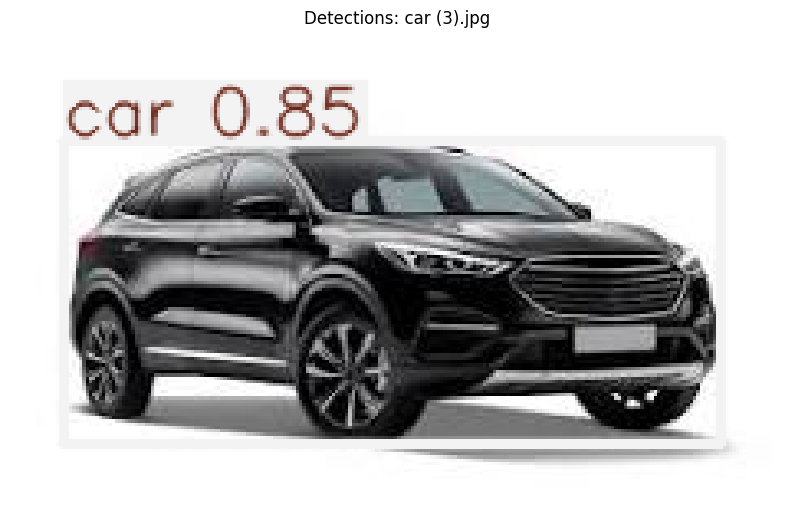


Done.


In [ ]:
# Upload image(s)
print("\nUpload image(s) to analyze:")
uploaded = files.upload()
if len(uploaded) == 0:
    print("No files uploaded. Exiting.")
    sys.exit()
for filename, filedata in uploaded.items():
    print(f"\nProcessing '{filename}'...")
    img = cv2.imdecode(np.frombuffer(filedata, np.uint8), cv2.IMREAD_COLOR)
    if img is None:
        print("Error reading image. Skipping.")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img_rgb)
    r = results[0]

    # Check for watched categories
    found_watch = []
    for box in r.boxes:
        cls_name = r.names[int(box.cls)]
        conf = float(box.conf)
        if cls_name in watched_classes and conf >= thr:
            found_watch.append((cls_name, conf))

    # Print recording status
    if found_watch:
        print("\nStart recording")
        for cname, conf in found_watch:
            print(f"Found {cname} confidence: {conf * 100:.2f}%")
    else:
        print("\nStop recording")
        print("No watched objects detected.")

    # Annotate and show result
    annotated = r.plot()
    plt.figure(figsize=(10, 8))
    plt.imshow(annotated)
    plt.axis("off")
    plt.title(f"Detections: {filename}")
    plt.show()

print("\nDone.")